In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import json

In [2]:
# загружаем датасет
df = pd.read_csv("USvideos.csv", encoding="utf-8")
with open("US_category_id.json") as f:
    tmp = json.load(f)["items"]
categories = {i["id"]: i for i in tmp}
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# типы
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [4]:
#создадим датасет, где не будут повторяться видео (в основном столько повторений, сколько дней видео в трендах)
df_unique = df.drop_duplicates(subset="video_id", keep="last")

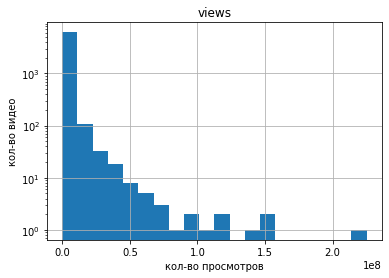

In [5]:
# Соотношение количесвто видео и количесвта их просмотров
df_unique.hist(column="views", bins=20, log=True)
plt.xlabel('кол-во просмотров')
plt.ylabel('кол-во видео')
plt.show()

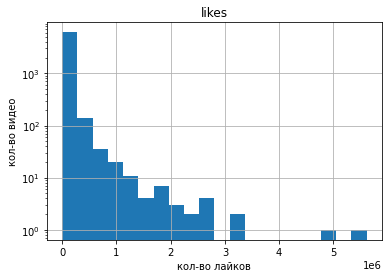

In [6]:
# сколько видеороликов имеют различное количество лайков
df_unique.hist(column="likes", bins=20, log=True)
plt.xlabel('кол-во лайков')
plt.ylabel('кол-во видео')
plt.show()

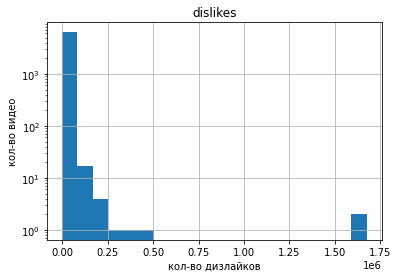

In [7]:
# сколько видеороликов имеют различное количество дизлайков
df_unique.hist(column="dislikes", bins=20, log=True)
plt.xlabel('кол-во дизлайков')
plt.ylabel('кол-во видео')
plt.show()

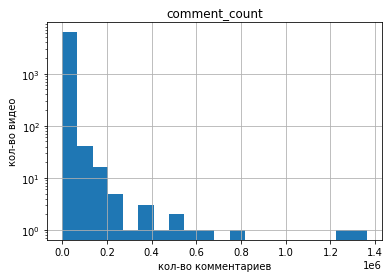

In [8]:
# сколько видеороликов имеют различное количество комментариев
df_unique.hist(column="comment_count", bins=20, log=True)
plt.xlabel('кол-во комментариев')
plt.ylabel('кол-во видео')
plt.show()

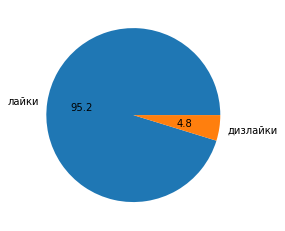

In [9]:
# соотношение лайков и дизлайков на видероликах в процентах
likes_count = np.sum(df["likes"])
dislikes_count = np.sum(df["dislikes"])
likes_percent = float(likes_count) / (likes_count + dislikes_count) * 100
dislikes_percent = float(dislikes_count) / (likes_count + dislikes_count) * 100
plt.pie([likes_percent, dislikes_percent], labels=["лайки", "дизлайки"], autopct="%.1f")
plt.show()

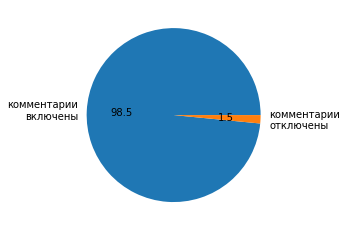

In [10]:
# на каком % видероликах отключены комментарии
dis_percent = float(df[df["comments_disabled"] == True].shape[0]) / df.shape[0] * 100
plt.pie([100 - dis_percent, dis_percent], labels=["комментарии\nвключены", "комментарии\nотключены"], autopct="%.1f")
plt.show()

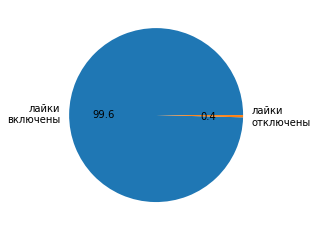

In [11]:
# на каком % видероликах отключены лайки
dis_percent = float(df[df["ratings_disabled"] == True].shape[0]) / df.shape[0] * 100
plt.pie([100 - dis_percent, dis_percent], labels=["лайки\nвключены", "лайки\nотключены"], autopct="%.1f")
plt.show()

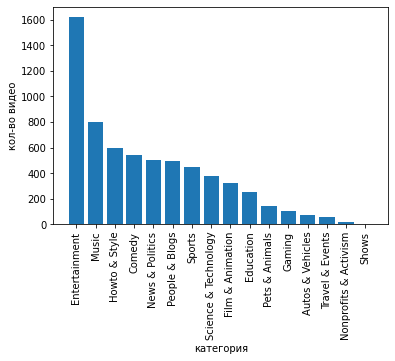

In [12]:
# топ популярных категорий
tmp = Counter(df_unique["category_id"])
top_categories = OrderedDict(sorted({categories[str(key)]["snippet"]["title"]: val for key, val in tmp.items()}.items(), key=lambda t: t[1], reverse=True))
plt.bar(*zip(*top_categories.items()))
plt.xticks(rotation=90)
plt.xlabel('категория')
plt.ylabel('кол-во видео')
plt.show()

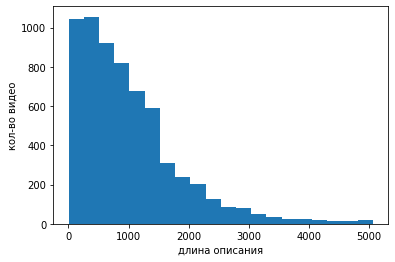

In [13]:
# распределение длин описания (в символах)
plt.hist([len(str(s)) for s in df_unique["description"]], bins=20)
plt.xlabel('длина описания')
plt.ylabel('кол-во видео')
plt.show()

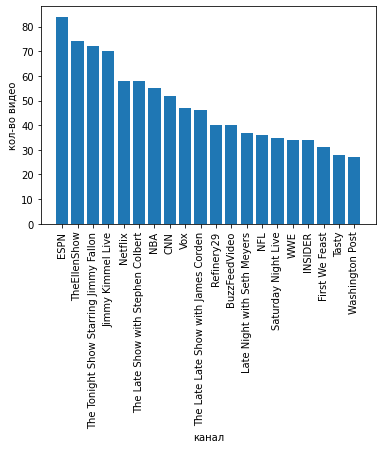

In [14]:
# топ каналов, чаще всего попадавших в тренды
tmp = Counter(df_unique["channel_title"])
top_channels = OrderedDict(sorted(tmp.items(), key=lambda t: t[1], reverse=True)[:20])
plt.bar(*zip(*top_channels.items()))
plt.xticks(rotation=90)
plt.xlabel('канал')
plt.ylabel('кол-во видео')
plt.show()

<AxesSubplot:xlabel='views', ylabel='likes'>

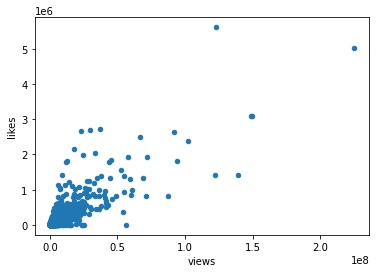

In [15]:
# отношение количества лайков к количеству просмотров
df_unique.plot.scatter(x="views", y="likes")

<AxesSubplot:xlabel='views', ylabel='likes'>

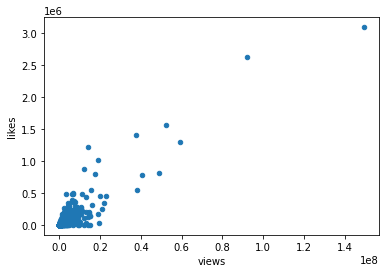

In [16]:
# отношение количества лайков к количеству просмотров для видео категории Entertainment (id = 24)
df_unique[df_unique["category_id"] == 24].plot.scatter(x="views", y="likes")